# Influenza Infection with an altered adaptive immune response

These are the Equations of the mathmatical model of "Modeling Within-Host Dynamics of Influenza VirusInfection Including Immune Responses" by Pawlek et al.

$$\begin{aligned}
&\frac{dT}{dt}=-\beta VT-\phi FT+\rho R
\\
&\frac{dI}{dt}=\beta VT-\delta_I I-\kappa IF-rIZ
\\
&\frac{dR}{dt}=\phi FT-\rho R
\\
&\frac{dV}{dt}=pI-cV-k_GVAg-k_MVAm
\\
&\frac{dF}{dt}=qI-dF
\\
&\frac{dZ}{dt}=vI-bZ
\\
&\frac{dAg}{dt}=aP-m1Ag
\\
&\frac{dAm}{dt}=gV-m2Am
\\
&\frac{dP}{dt}=nV-d_pP
\end{aligned}$$


by Team 7

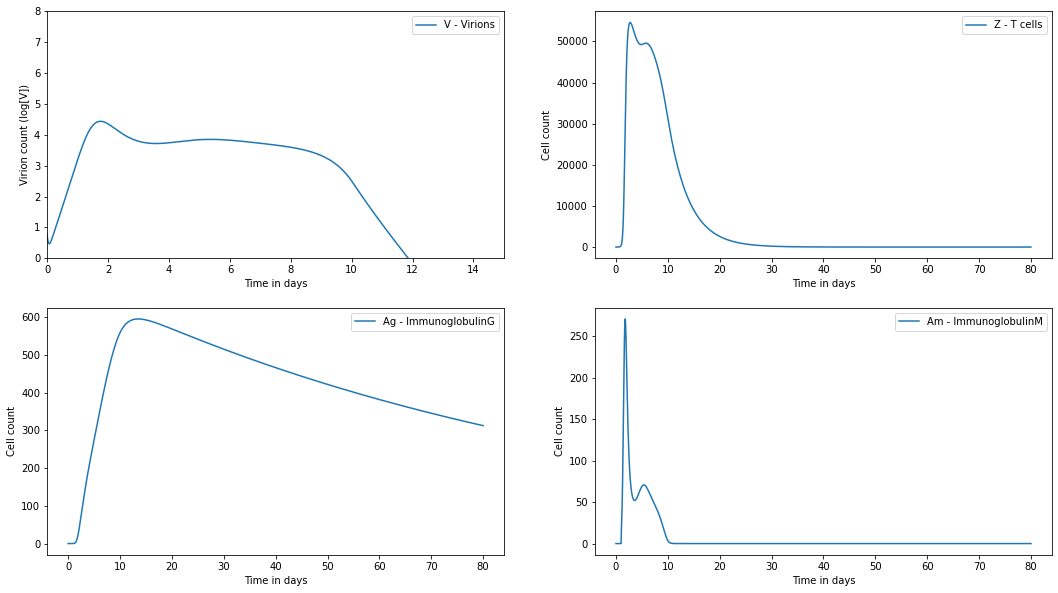

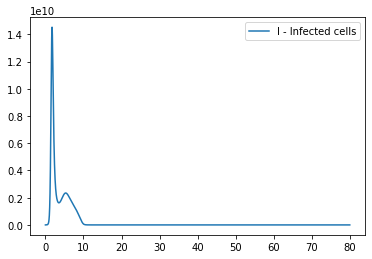

In [23]:
import numpy as np
import pylab as pl
from scipy.integrate import odeint

#Here the Parameters are defined (Pony 1)
beta = 8.3*10**-6
fi = 6.9*10**-2
ro = 1*10**-2
dltI = 0.1
k = 1.6
p = 7.7*10**-5
c = 20
q = 6.1*10**-10
d = 0.85

#adaptive - Lymphocytes
r= 1*10**-8
v = 5.5*10**-6
b = 0.25

#IGM IG
kg=4.5*10**-8
km=0.078

#G - to fit
a=35
m1=0.01

#M - to fit
g=0.3
m2=30

#Plasma cell - to fit
n=1.5*10**-4
d_p=0.5



# exponential function for the immune response
mhy=6 #this is the adaptive immune system for pony 2 but it fits Pony 1 better
sig=1
dltA=dltI

# Here the ODE System is defined
def f(xy):
    T, I, R, V, F, Z , G, M,P= xy
    Tp = - beta*V*T - fi*F*T + ro*R #Target cells
    Ip = beta*V*T - dltA*I - k*I*F - r*I*Z #Infected cells
    Rp = fi*F*T - ro*R #Refractory cells
    Vp = p*I - c*V - kg*G*V - km*M*V #Free virus
    Fp = q*I - d*F #Interfeon
    Zp = v*I - b*Z #Lymphocytes
    Gp = a*P - m1*G #IgG
    Mp = g*V - m2*M #IgM
    Pp = n*V - d_p*P #Plasma cells (intermediate between virus and IgG)

    return np.array([Tp, Ip, Rp, Vp, Fp, Zp, Gp, Mp, Pp])


# Solving the ODE using Heun's method

Tmax = 80   #time in days
dt = 0.01    # integration time step
dt2 = dt/2
t=0
# time delay
tauM=1
tauG=6
tauI=8
taud=10

xy = np.array([3.5*10**11, 0, 0, 6, 1,0,0,0,0]) # Value for Viral load is just chosen by looking at the graph
tvec = np.arange(0,Tmax,dt)
tvec2 = np.zeros(1)
xy_out = xy
for i in range(tvec.size):
    t=(i*Tmax)/tvec.size
    if taud>t:
        dltA=dltI*np.exp(sig*((i*Tmax)/tvec.size-mhy))
    xyi = xy + dt*f(xy)          
    xy = xy + dt2*(f(xy)+f(xyi))
    if (t<tauM): xy[7]=0 # if t is under time delay F is resetted
#     if (t<tauG): xy[6]=0 # if t is under time delay F is resetted
#     if (t>tauI): xy[1]=0 # problem in I
    xy_out = np.vstack([xy_out,xy])
    tvec2 = np.vstack([tvec2,tvec[i]])


# Solving the ODE using the solution they found in the paper (our version is better)

'''Vp=700000
tp=1.5
vec1=np.arange(0,Tmax,0.1)
vec2 = np.zeros(1)
V=0
Vout=V
for i in range(vec1.size):
    dltA=dltI*np.exp(sig*(i-mhy))
    V=Vp*np.exp(-c*(i-tp))+(c*Vp/(c-dltA))*(np.exp(-dltA*(i-tp))-np.exp(-c*(i-tp)))
    Vout= np.vstack([Vout,V])
    vec2=np.vstack([vec2,vec1[i]])'''


    
# Plotting the Graph
fig, pos = pl.subplots(2,2, figsize = (18,10))

#pl.plot(tvec2,xy_out[:,0],label='T')
# pos[1].plot(tvec2,xy_out[:,1],label='I')
#pl.plot(tvec2,xy_out[:,2],label='R')
# pos[0,0].plot(tvec2,xy_out[:,3],label='V')
pos[0,0].plot(tvec2,np.log10(xy_out[:,3]),label='V - Virions')
#pl.plot(tvec2,xy_out[:,4],label='F')
pos[0,1].plot(tvec2,xy_out[:,5],label='Z - T cells')
pos[1,0].plot(tvec2,xy_out[:,6],label='Ag - ImmunoglobulinG')
pos[1,1].plot(tvec2,xy_out[:,7],label='Am - ImmunoglobulinM')
# pos[1].plot(tvec2,xy_out[:,8],label='P')
pl.legend()
pos[0,0].set_ylim(0,8)
pos[0,0].set_xlim(0,15)
pos[0,0].set_xlabel('Time in days')
pos[0,1].set_xlabel('Time in days')
pos[1,0].set_xlabel('Time in days')
pos[1,1].set_xlabel('Time in days')

pos[0,0].set_ylabel('Virion count (log[V])')
# pos[0,0].set_ylabel('Virion count')
pos[0,1].set_ylabel('Cell count')

pos[1,0].set_ylabel('Cell count')
pos[1,1].set_ylabel('Cell count')

pos[0,0].legend()
pos[1,0].legend()
pos[0,1].legend()
pos[1,1].legend()

#pl.ylabel('T, I, R, V, F')
# pl.ylabel('V in log10')
pl.show()

# figures, pos = plt.subplots(1,2, figsize = (18,5))
# pos[0].
pl.plot(tvec2,xy_out[:,1],label='I - Infected cells')
pl.legend()
pl.show()

